Dataset : Adult Income Dataset

Applying Cross-Validation to Random Forest Classifier

Exercise: Implement a random forest classifier and evaluate the model using k-fold cross-validation. Analyze the cross-validation scores to assess model stability.

Investigating Overfitting and Underfitting in Gradient Boosting Machines

Exercise: Train a gradient boosting classifier with varying numbers of estimators and learning rates. Evaluate the model for overfitting and underfitting by comparing training and validation performance.

Evaluating Precision, Recall, and F1-Score for Random Forests

Exercise: Implement a random forest classifier and calculate precision, recall, and F1-score. Discuss the trade-offs between these metrics and their importance for classification tasks.

ROC Curve and AUC for Gradient Boosting Classifier

Exercise: Implement a gradient boosting classifier and plot the ROC curve.
Compute the AUC and interpret how well the model distinguishes between classes.

Model Performance Comparison with Different Metrics

Exercise: Compare the performance of different classifiers (e.g., SVM, random forest, gradient boosting) using cross-validation. Evaluate and compare the models based on accuracy, precision, recall, F1-score, and ROC-AUC.


# Necessary Libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

In [3]:
# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
           'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
data = pd.read_csv(url, names=columns)

In [4]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data Preprocessing


In [5]:
data.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [6]:
# Preprocess the data
label_encoders = {}   #initialize empty dictionary
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [7]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [10]:
data['income'].value_counts()

,count
income,
0,24720
1,7841


**Dataset is imbalanced in assignment we have only train model.**

**For better result we can also use sampling technique to handel imbalanced data.**

In [11]:
# Split features and target
X = data.drop('income', axis=1)
y = data['income']


In [12]:
# Implement Random Forest Classifier
rf = RandomForestClassifier()

In [13]:
# Apply K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)
cv_scores = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean()}')

Cross-Validation Scores: [0.86427146 0.85641892 0.8585688  0.85565111 0.84935504]
Mean CV Score: 0.8568530629159372


# Investigating Overfitting and Underfitting in Gradient Boosting Machines

In [15]:
train_scores = []
val_scores = []
estimators = [50,100,150,200]
learning_rates = [0.01,0.05,0.1,0.2]

In [16]:
for n_estimators in estimators:
  for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=1)
    gb.fit(X, y)


    #using cross validation for validation score
    cv_scores = cross_val_score(gb, X, y, cv=kf, scoring = 'accuracy')

    #training score
    train_score = accuracy_score(y, gb.predict(X))

    train_scores.append((n_estimators, learning_rate, train_score))
    val_scores.append((n_estimators, learning_rate, cv_scores.mean))


In [18]:
# Convert to dataframe for better visualization

train_df = pd.DataFrame(train_scores, columns=['n_estimators', 'learning_rate', 'train_score'])
val_df = pd.DataFrame(val_scores, columns=['n_estimators', 'learning_rate', 'val_score'])

In [20]:
print('Training Score')
print(train_df)
print('\n')
print('Validation Score')
print(val_df)

Training Score
    n_estimators  learning_rate  train_score
0             50           0.01     0.803507
1             50           0.05     0.852554
2             50           0.10     0.859894
3             50           0.20     0.869384
4            100           0.01     0.831701
5            100           0.05     0.858972
6            100           0.10     0.868217
7            100           0.20     0.876785
8            150           0.01     0.846933
9            150           0.05     0.862934
10           150           0.10     0.873468
11           150           0.20     0.880716
12           200           0.01     0.848838
13           200           0.05     0.867787
14           200           0.10     0.876263
15           200           0.20     0.884371


Validation Score
    n_estimators  learning_rate  \
0             50           0.01   
1             50           0.05   
2             50           0.10   
3             50           0.20   
4            100          

# Evaluating Precision Recall, And F1-score for Random Forests.

In [21]:
#implemeting Random Forest Classifier

rf = RandomForestClassifier()
rf.fit(X, y)

# predicting on trainin data
y_pred = rf.predict(X)

In [22]:
# Calculating Precision, Recall adn F1-Score

precision = precision_score(y, y_pred, average = 'binary')
recall = recall_score(y, y_pred, average = 'binary')
f1 = f1_score(y, y_pred, average = 'binary')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Precision: 1.0
Recall: 0.999489860987119
F1-Score: 0.9997448654165072


# Roc Curve and AUC for Gradient Boosting Classifier

In [23]:
gbc = GradientBoostingClassifier()
gbc.fit(X, y)

# predicting Probabilites

y_pred_porb = gbc.predict_proba(X)[:, 1]

#compute Roc curve and AUC

fpr, tpr, thresholds = roc_curve(y, y_pred_porb)
roc_auc = auc(fpr, tpr)

### Ploting Roc Curve

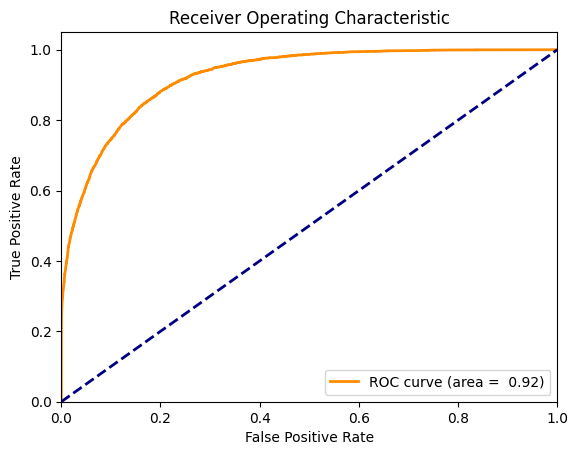

In [24]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc: .2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Model Performance Comparison With Different Metrics

In [28]:
# defining Classifier

classifiers ={
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier()
}